# Lab 3: Pandas Basics with Iris Dataset

## Learning Objectives
By the end of this lab, you will be able to:
- Load and explore datasets using pandas
- Perform basic data manipulation and cleaning
- Calculate descriptive statistics
- Group and aggregate data
- Handle missing values
- Create basic visualizations with pandas

## Introduction
Pandas is the cornerstone library for data manipulation and analysis in Python. In this lab, we'll use the famous Iris dataset to learn fundamental pandas operations.

## Setup and Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Set display options for better output formatting
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the Iris dataset
iris_data = load_iris()

# Create a DataFrame
iris_df = pd.DataFrame(
    data=iris_data.data,
    columns=iris_data.feature_names
)

# Add the target variable
iris_df['species'] = iris_data.target
iris_df['species_name'] = iris_df['species'].map(
    {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
)

print("Iris dataset loaded successfully!")
print(f"Dataset shape: {iris_df.shape}")

Iris dataset loaded successfully!
Dataset shape: (150, 6)


## 1. Basic Data Exploration

In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
print(iris_df.head())

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  


In [4]:
# Get basic information about the dataset
print("Dataset Info:")
print(iris_df.info())
print("\n" + "="*50 + "\n")

print("Dataset Description:")
print(iris_df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
 5   species_name       150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB
None


Dataset Description:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.

In [5]:
# Check data types
print("Data types:")
print(iris_df.dtypes)
print("\n" + "="*50 + "\n")

# Check for missing values
print("Missing values:")
print(iris_df.isnull().sum())
print("\n" + "="*50 + "\n")

# Check unique values in categorical columns
print("Unique species:")
print(iris_df['species_name'].unique())
print("\nSpecies value counts:")
print(iris_df['species_name'].value_counts())

Data types:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int32
species_name          object
dtype: object


Missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64


Unique species:
['setosa' 'versicolor' 'virginica']

Species value counts:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


### Exercise 1: Basic Exploration
Complete the following tasks:
1. Display the last 10 rows of the dataset
2. Get the shape and column names of the dataset
3. Calculate the memory usage of the DataFrame

In [6]:
# Your code here
# Task 1: Display last 10 rows


# Task 2: Shape and column names


# Task 3: Memory usage


## 2. Data Selection and Indexing

In [7]:
# Selecting columns
print("Selecting single column (sepal length):")
sepal_length = iris_df['sepal length (cm)']
print(type(sepal_length))
print(sepal_length.head())

print("\n" + "="*50 + "\n")

# Selecting multiple columns
print("Selecting multiple columns:")
sepal_data = iris_df[['sepal length (cm)', 'sepal width (cm)']]
print(type(sepal_data))
print(sepal_data.head())

Selecting single column (sepal length):
<class 'pandas.core.series.Series'>
0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal length (cm), dtype: float64


Selecting multiple columns:
<class 'pandas.core.frame.DataFrame'>
   sepal length (cm)  sepal width (cm)
0                5.1               3.5
1                4.9               3.0
2                4.7               3.2
3                4.6               3.1
4                5.0               3.6


In [8]:
# Row selection using iloc (integer location)
print("First 5 rows using iloc:")
print(iris_df.iloc[0:5])

print("\n" + "="*50 + "\n")

# Row selection using loc (label-based)
print("Rows 10-15 using loc:")
print(iris_df.loc[10:15])

First 5 rows using iloc:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  


Rows 10-15 using loc:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
10                5.4               3.7                1.5               0.2   
11                4.8               3.4                1.6               0.2   
12                4.8               3.0                1.4               0.1   


In [9]:
# Boolean indexing
print("Filtering for setosa species:")
setosa_data = iris_df[iris_df['species_name'] == 'setosa']
print(f"Number of setosa samples: {len(setosa_data)}")
print(setosa_data.head())

print("\n" + "="*50 + "\n")

# Multiple conditions
print("Filtering for large sepals (length > 6.0 AND width > 3.0):")
large_sepals = iris_df[
    (iris_df['sepal length (cm)'] > 6.0) & 
    (iris_df['sepal width (cm)'] > 3.0)
]
print(f"Number of samples with large sepals: {len(large_sepals)}")
print(large_sepals[['sepal length (cm)', 'sepal width (cm)', 'species_name']].head())

Filtering for setosa species:
Number of setosa samples: 50
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  


Filtering for large sepals (length > 6.0 AND width > 3.0):
Number of samples with large sepals: 23
    sepal length (cm)  sepal width (cm) species_name
50                7.0               3.2   versicolor
51                6.4               3.2   versicolor
52                6.9               3.1   versicol

### Exercise 2: Data Selection
Complete the following tasks:
1. Select all petal measurements (length and width)
2. Get the first 25 rows of the dataset
3. Filter for virginica species with petal length > 5.0
4. Select rows 50-99 and only the sepal measurements

In [10]:
# Your code here
# Task 1: Select petal measurements


# Task 2: First 25 rows


# Task 3: Filter virginica with petal length > 5.0


# Task 4: Rows 50-99, sepal measurements only


## 3. Descriptive Statistics

In [11]:
# Basic statistics for numerical columns
print("Descriptive statistics for all numerical columns:")
print(iris_df.describe())

print("\n" + "="*50 + "\n")

# Individual statistics
print("Individual statistics:")
print(f"Mean sepal length: {iris_df['sepal length (cm)'].mean():.2f}")
print(f"Median sepal length: {iris_df['sepal length (cm)'].median():.2f}")
print(f"Standard deviation of sepal length: {iris_df['sepal length (cm)'].std():.2f}")
print(f"Min sepal length: {iris_df['sepal length (cm)'].min():.2f}")
print(f"Max sepal length: {iris_df['sepal length (cm)'].max():.2f}")

Descriptive statistics for all numerical columns:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


Individual statistic

In [12]:
# Correlation matrix
print("Correlation matrix:")
numerical_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
correlation_matrix = iris_df[numerical_cols].corr()
print(correlation_matrix)

Correlation matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


In [13]:
# Quantiles
print("Quantiles for sepal length:")
quantiles = [0.25, 0.5, 0.75, 0.9, 0.95]
for q in quantiles:
    value = iris_df['sepal length (cm)'].quantile(q)
    print(f"{q*100}th percentile: {value:.2f}")

Quantiles for sepal length:
25.0th percentile: 5.10
50.0th percentile: 5.80
75.0th percentile: 6.40
90.0th percentile: 6.90
95.0th percentile: 7.25


### Exercise 3: Descriptive Statistics
Complete the following tasks:
1. Calculate the coefficient of variation (std/mean) for all numerical columns
2. Find the range (max - min) for each measurement
3. Calculate the interquartile range (75th percentile - 25th percentile) for petal width

In [14]:
# Your code here
# Task 1: Coefficient of variation


# Task 2: Range for each measurement


# Task 3: IQR for petal width


## 4. Groupby Operations

In [15]:
# Group by species and calculate mean
print("Mean measurements by species:")
species_means = iris_df.groupby('species_name')[numerical_cols].mean()
print(species_means)

Mean measurements by species:
              sepal length (cm)  sepal width (cm)  petal length (cm)  \
species_name                                                           
setosa                    5.006             3.428              1.462   
versicolor                5.936             2.770              4.260   
virginica                 6.588             2.974              5.552   

              petal width (cm)  
species_name                    
setosa                   0.246  
versicolor               1.326  
virginica                2.026  


In [16]:
# Multiple aggregations
print("Multiple statistics by species:")
species_stats = iris_df.groupby('species_name')[numerical_cols].agg(['mean', 'std', 'min', 'max'])
print(species_stats)

Multiple statistics by species:
             sepal length (cm)                     sepal width (cm)            \
                          mean       std  min  max             mean       std   
species_name                                                                    
setosa                   5.006  0.352490  4.3  5.8            3.428  0.379064   
versicolor               5.936  0.516171  4.9  7.0            2.770  0.313798   
virginica                6.588  0.635880  4.9  7.9            2.974  0.322497   

                       petal length (cm)                     petal width (cm)  \
              min  max              mean       std  min  max             mean   
species_name                                                                    
setosa        2.3  4.4             1.462  0.173664  1.0  1.9            0.246   
versicolor    2.0  3.4             4.260  0.469911  3.0  5.1            1.326   
virginica     2.2  3.8             5.552  0.551895  4.5  6.9            2.02

In [17]:
# Custom aggregations
print("Custom aggregations by species:")
custom_agg = iris_df.groupby('species_name').agg({
    'sepal length (cm)': ['mean', 'std'],
    'petal length (cm)': ['min', 'max'],
    'species': 'count'  # count of samples
})
print(custom_agg)

Custom aggregations by species:
             sepal length (cm)           petal length (cm)      species
                          mean       std               min  max   count
species_name                                                           
setosa                   5.006  0.352490               1.0  1.9      50
versicolor               5.936  0.516171               3.0  5.1      50
virginica                6.588  0.635880               4.5  6.9      50


### Exercise 4: Groupby Operations
Complete the following tasks:
1. Calculate the median for each measurement by species
2. Find the species with the largest average petal area (length × width)
3. Create a summary showing count, mean, and standard deviation for sepal width by species

In [18]:
# Your code here
# Task 1: Median by species


# Task 2: Largest average petal area
# First create petal area column


# Task 3: Summary for sepal width


## 5. Data Manipulation and Cleaning

In [19]:
# Create a copy for manipulation
iris_copy = iris_df.copy()

# Adding new columns
iris_copy['sepal_area'] = iris_copy['sepal length (cm)'] * iris_copy['sepal width (cm)']
iris_copy['petal_area'] = iris_copy['petal length (cm)'] * iris_copy['petal width (cm)']
iris_copy['total_area'] = iris_copy['sepal_area'] + iris_copy['petal_area']

print("Added new columns:")
print(iris_copy[['sepal_area', 'petal_area', 'total_area', 'species_name']].head())

Added new columns:
   sepal_area  petal_area  total_area species_name
0       17.85        0.28       18.13       setosa
1       14.70        0.28       14.98       setosa
2       15.04        0.26       15.30       setosa
3       14.26        0.30       14.56       setosa
4       18.00        0.28       18.28       setosa


In [20]:
# Creating categorical columns
# Categorize flowers by size
def categorize_size(row):
    if row['total_area'] < 10:
        return 'Small'
    elif row['total_area'] < 20:
        return 'Medium'
    else:
        return 'Large'

iris_copy['size_category'] = iris_copy.apply(categorize_size, axis=1)

print("Size category distribution:")
print(iris_copy['size_category'].value_counts())

print("\nSize category by species:")
print(pd.crosstab(iris_copy['species_name'], iris_copy['size_category']))

Size category distribution:
size_category
Large     93
Medium    57
Name: count, dtype: int64

Size category by species:
size_category  Large  Medium
species_name                
setosa             9      41
versicolor        35      15
virginica         49       1


In [21]:
# Introducing missing values for demonstration
iris_missing = iris_copy.copy()

# Randomly introduce some missing values
np.random.seed(42)
missing_indices = np.random.choice(iris_missing.index, size=10, replace=False)
iris_missing.loc[missing_indices, 'sepal width (cm)'] = np.nan

print("Missing values introduced:")
print(iris_missing.isnull().sum())

print("\nRows with missing values:")
print(iris_missing[iris_missing.isnull().any(axis=1)][['sepal width (cm)', 'species_name']])

Missing values introduced:
sepal length (cm)     0
sepal width (cm)     10
petal length (cm)     0
petal width (cm)      0
species               0
species_name          0
sepal_area            0
petal_area            0
total_area            0
size_category         0
dtype: int64

Rows with missing values:
     sepal width (cm) species_name
18                NaN       setosa
31                NaN       setosa
64                NaN   versicolor
68                NaN   versicolor
73                NaN   versicolor
76                NaN   versicolor
78                NaN   versicolor
82                NaN   versicolor
118               NaN    virginica
141               NaN    virginica


In [22]:
# Handling missing values

# Method 1: Drop rows with missing values
iris_dropped = iris_missing.dropna()
print(f"Original shape: {iris_missing.shape}")
print(f"After dropping missing: {iris_dropped.shape}")

# Method 2: Fill with mean
iris_filled_mean = iris_missing.copy()
mean_sepal_width = iris_filled_mean['sepal width (cm)'].mean()
iris_filled_mean['sepal width (cm)'].fillna(mean_sepal_width, inplace=True)

print(f"\nMean sepal width used for filling: {mean_sepal_width:.2f}")
print(f"Missing values after mean filling: {iris_filled_mean.isnull().sum()['sepal width (cm)']}")

# Method 3: Fill with group mean (by species)
iris_filled_group = iris_missing.copy()
iris_filled_group['sepal width (cm)'] = iris_filled_group.groupby('species_name')['sepal width (cm)'].transform(
    lambda x: x.fillna(x.mean())
)

print(f"Missing values after group mean filling: {iris_filled_group.isnull().sum()['sepal width (cm)']}")

Original shape: (150, 10)
After dropping missing: (140, 10)

Mean sepal width used for filling: 3.07
Missing values after mean filling: 0
Missing values after group mean filling: 0


C:\Users\nicol\AppData\Local\Temp\ipykernel_18552\3441457610.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  iris_filled_mean['sepal width (cm)'].fillna(mean_sepal_width, inplace=True)


### Exercise 5: Data Manipulation
Complete the following tasks:
1. Create a new column 'aspect_ratio' = sepal_length / sepal_width
2. Categorize flowers as 'Narrow' or 'Wide' based on whether aspect_ratio > 2.0
3. Create a function to standardize (z-score) the numerical measurements
4. Handle missing values in petal length using forward fill method

In [23]:
# Your code here
# Task 1: Aspect ratio


# Task 2: Narrow/Wide categorization


# Task 3: Standardization function


# Task 4: Forward fill (first introduce some missing values in petal length)


## 6. Basic Visualizations with Pandas

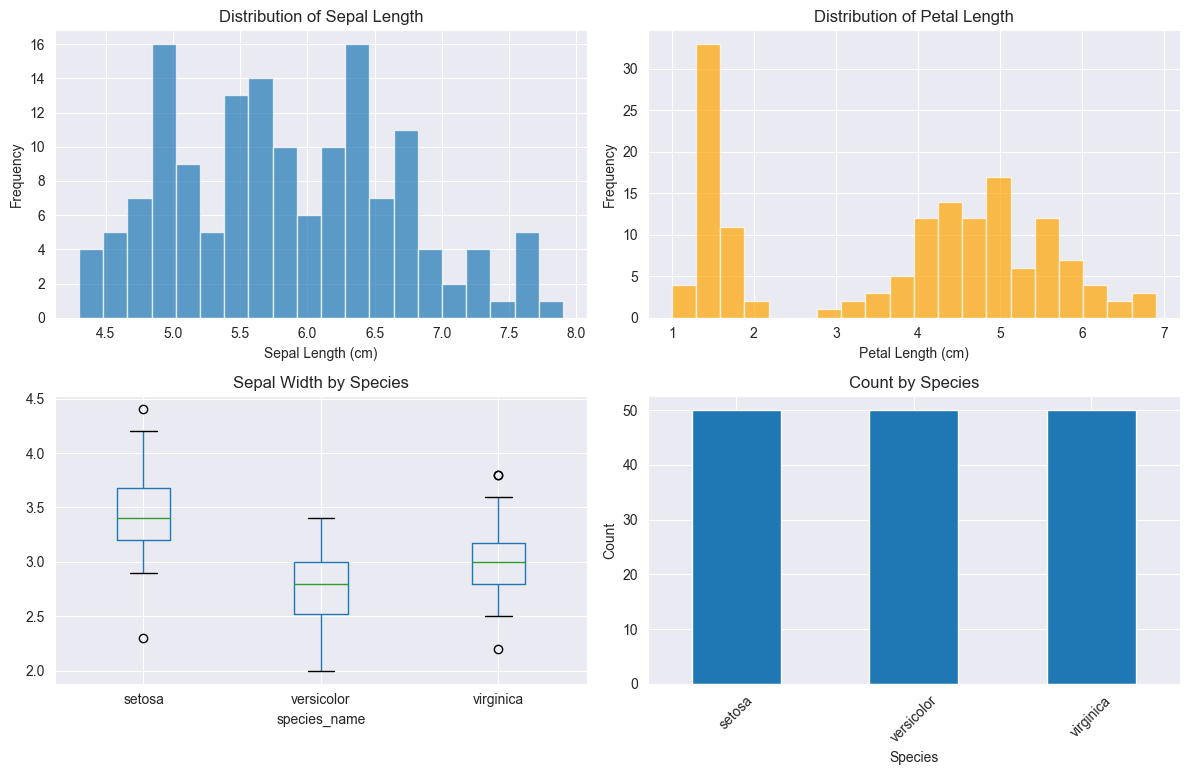

In [24]:
# Histogram
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
iris_df['sepal length (cm)'].hist(bins=20, alpha=0.7)
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
iris_df['petal length (cm)'].hist(bins=20, alpha=0.7, color='orange')
plt.title('Distribution of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
iris_df.boxplot(column='sepal width (cm)', by='species_name', ax=plt.gca())
plt.title('Sepal Width by Species')
plt.suptitle('')  # Remove default title

plt.subplot(2, 2, 4)
species_counts = iris_df['species_name'].value_counts()
species_counts.plot(kind='bar')
plt.title('Count by Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

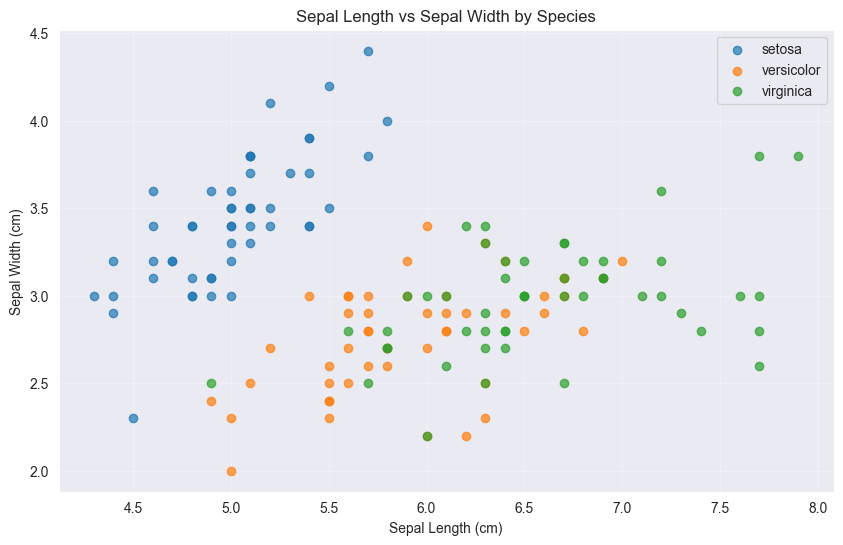

In [25]:
# Scatter plot
plt.figure(figsize=(10, 6))

for i, species in enumerate(iris_df['species_name'].unique()):
    species_data = iris_df[iris_df['species_name'] == species]
    plt.scatter(
        species_data['sepal length (cm)'], 
        species_data['sepal width (cm)'],
        label=species,
        alpha=0.7
    )

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width by Species')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

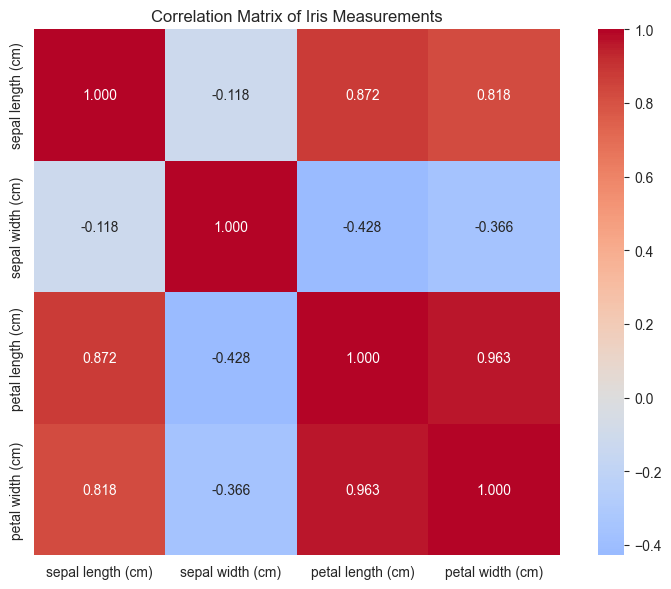

In [26]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = iris_df[numerical_cols].corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f')
plt.title('Correlation Matrix of Iris Measurements')
plt.tight_layout()
plt.show()

### Exercise 6: Visualizations
Complete the following tasks:
1. Create a histogram showing the distribution of petal width for each species (use subplots)
2. Make a scatter plot of petal length vs petal width, colored by species
3. Create a bar plot showing the mean total area by species
4. Make a box plot comparing all four measurements side by side

In [27]:
# Your code here
# Task 1: Histogram of petal width by species


# Task 2: Scatter plot petal length vs width


# Task 3: Bar plot of mean total area


# Task 4: Box plot of all measurements


## 7. Advanced Pandas Operations

In [28]:
# Pivot tables
print("Pivot table - Mean measurements by species:")
pivot_table = iris_df.pivot_table(
    values=numerical_cols,
    index='species_name',
    aggfunc='mean'
)
print(pivot_table)

Pivot table - Mean measurements by species:
              petal length (cm)  petal width (cm)  sepal length (cm)  \
species_name                                                           
setosa                    1.462             0.246              5.006   
versicolor                4.260             1.326              5.936   
virginica                 5.552             2.026              6.588   

              sepal width (cm)  
species_name                    
setosa                   3.428  
versicolor               2.770  
virginica                2.974  


In [29]:
# Melting data (wide to long format)
iris_melted = iris_df.melt(
    id_vars=['species_name'],
    value_vars=numerical_cols,
    var_name='measurement_type',
    value_name='measurement_value'
)

print("Melted data (first 10 rows):")
print(iris_melted.head(10))

print(f"\nOriginal shape: {iris_df.shape}")
print(f"Melted shape: {iris_melted.shape}")

Melted data (first 10 rows):
  species_name   measurement_type  measurement_value
0       setosa  sepal length (cm)                5.1
1       setosa  sepal length (cm)                4.9
2       setosa  sepal length (cm)                4.7
3       setosa  sepal length (cm)                4.6
4       setosa  sepal length (cm)                5.0
5       setosa  sepal length (cm)                5.4
6       setosa  sepal length (cm)                4.6
7       setosa  sepal length (cm)                5.0
8       setosa  sepal length (cm)                4.4
9       setosa  sepal length (cm)                4.9

Original shape: (150, 6)
Melted shape: (600, 3)


In [30]:
# String operations
iris_string = iris_df.copy()

# Create a description column
iris_string['description'] = (
    iris_string['species_name'].str.title() + 
    ' iris with ' + 
    iris_string['sepal length (cm)'].round(1).astype(str) + 
    'cm sepal'
)

print("Description column examples:")
print(iris_string[['species_name', 'description']].head())

# String filtering
long_sepal_descriptions = iris_string[iris_string['description'].str.contains('6.')]
print(f"\nFlowers with sepal length starting with 6.: {len(long_sepal_descriptions)}")

Description column examples:
  species_name                   description
0       setosa  Setosa iris with 5.1cm sepal
1       setosa  Setosa iris with 4.9cm sepal
2       setosa  Setosa iris with 4.7cm sepal
3       setosa  Setosa iris with 4.6cm sepal
4       setosa  Setosa iris with 5.0cm sepal

Flowers with sepal length starting with 6.: 65


### Exercise 7: Advanced Operations
Complete the following tasks:
1. Create a pivot table showing min and max values for each measurement by species
2. Melt the data but keep both species columns (species and species_name)
3. Create a new column that categorizes each flower as 'Above Average' or 'Below Average' based on total area
4. Use string operations to create a formatted summary for each flower

In [31]:
# Your code here
# Task 1: Pivot table with min and max


# Task 2: Melt with both species columns


# Task 3: Above/Below average categorization


# Task 4: Formatted summary


## 8. Performance Tips and Best Practices

In [32]:
# Efficient operations
import time

# Create a larger dataset for timing comparisons
large_iris = pd.concat([iris_df] * 1000, ignore_index=True)
print(f"Large dataset shape: {large_iris.shape}")

# Compare vectorized vs loop operations
def calculate_area_loop(df):
    areas = []
    for idx, row in df.iterrows():
        area = row['sepal length (cm)'] * row['sepal width (cm)']
        areas.append(area)
    return areas

def calculate_area_vectorized(df):
    return df['sepal length (cm)'] * df['sepal width (cm)']

# Time the operations
start_time = time.time()
areas_vectorized = calculate_area_vectorized(large_iris)
vectorized_time = time.time() - start_time

# Note: Commenting out the loop version as it would be very slow
# start_time = time.time()
# areas_loop = calculate_area_loop(large_iris.head(1000))  # Just first 1000 rows
# loop_time = time.time() - start_time

print(f"Vectorized operation time: {vectorized_time:.4f} seconds")
print("Loop operation: Would be much slower (commented out for efficiency)")
print("\nKey takeaway: Always use vectorized operations in pandas!")

Large dataset shape: (150000, 6)
Vectorized operation time: 0.0010 seconds
Loop operation: Would be much slower (commented out for efficiency)

Key takeaway: Always use vectorized operations in pandas!


In [33]:
# Memory optimization
print("Memory usage optimization:")

# Check current memory usage
print("\nOriginal dtypes and memory usage:")
print(iris_df.dtypes)
print(f"Memory usage: {iris_df.memory_usage(deep=True).sum()} bytes")

# Optimize dtypes
iris_optimized = iris_df.copy()

# Convert float64 to float32 for measurements
for col in numerical_cols:
    iris_optimized[col] = iris_optimized[col].astype('float32')

# Convert species to category
iris_optimized['species_name'] = iris_optimized['species_name'].astype('category')
iris_optimized['species'] = iris_optimized['species'].astype('int8')

print("\nOptimized dtypes and memory usage:")
print(iris_optimized.dtypes)
print(f"Memory usage: {iris_optimized.memory_usage(deep=True).sum()} bytes")

memory_saved = iris_df.memory_usage(deep=True).sum() - iris_optimized.memory_usage(deep=True).sum()
print(f"Memory saved: {memory_saved} bytes")

Memory usage optimization:

Original dtypes and memory usage:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int32
species_name          object
dtype: object
Memory usage: 14132 bytes

Optimized dtypes and memory usage:
sepal length (cm)     float32
sepal width (cm)      float32
petal length (cm)     float32
petal width (cm)      float32
species                  int8
species_name         category
dtype: object
Memory usage: 3112 bytes
Memory saved: 11020 bytes


## 9. Summary and Key Takeaways

In [34]:
# Final summary analysis
print("=" * 60)
print("FINAL SUMMARY: IRIS DATASET ANALYSIS")
print("=" * 60)

print(f"\n1. Dataset Overview:")
print(f"   - Total samples: {len(iris_df)}")
print(f"   - Features: {len(numerical_cols)} numerical measurements")
print(f"   - Species: {iris_df['species_name'].nunique()} (balanced dataset)")

print(f"\n2. Key Findings:")
species_summary = iris_df.groupby('species_name')[numerical_cols].mean()
print(f"   - Largest average sepal length: {species_summary['sepal length (cm)'].idxmax()}")
print(f"   - Largest average petal area: {(species_summary['petal length (cm)'] * species_summary['petal width (cm)']).idxmax()}")

# Strongest correlations
corr_matrix = iris_df[numerical_cols].corr()
# Get upper triangle of correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
strongest_corr = upper_tri.stack().abs().idxmax()
strongest_corr_value = upper_tri.stack().abs().max()

print(f"   - Strongest correlation: {strongest_corr[0]} vs {strongest_corr[1]} (r={strongest_corr_value:.3f})")

print(f"\n3. Data Quality:")
print(f"   - Missing values: {iris_df.isnull().sum().sum()}")
print(f"   - Duplicate rows: {iris_df.duplicated().sum()}")
print(f"   - Data types: All appropriate for analysis")

print(f"\n4. Pandas Skills Demonstrated:")
skills = [
    "Data loading and exploration",
    "Boolean indexing and filtering",
    "Descriptive statistics",
    "Groupby operations and aggregations",
    "Data manipulation and feature engineering",
    "Missing value handling",
    "Basic visualizations",
    "Advanced operations (pivot, melt, string ops)",
    "Performance optimization"
]

for i, skill in enumerate(skills, 1):
    print(f"   {i}. {skill}")

print("\n" + "=" * 60)
print("Great job completing the Pandas basics lab!")
print("=" * 60)

FINAL SUMMARY: IRIS DATASET ANALYSIS

1. Dataset Overview:
   - Total samples: 150
   - Features: 4 numerical measurements
   - Species: 3 (balanced dataset)

2. Key Findings:
   - Largest average sepal length: virginica
   - Largest average petal area: virginica
   - Strongest correlation: petal length (cm) vs petal width (cm) (r=0.963)

3. Data Quality:
   - Missing values: 0
   - Duplicate rows: 1
   - Data types: All appropriate for analysis

4. Pandas Skills Demonstrated:
   1. Data loading and exploration
   2. Boolean indexing and filtering
   3. Descriptive statistics
   4. Groupby operations and aggregations
   5. Data manipulation and feature engineering
   6. Missing value handling
   7. Basic visualizations
   8. Advanced operations (pivot, melt, string ops)
   9. Performance optimization

Great job completing the Pandas basics lab!


## Next Steps

Now that you've mastered pandas basics, here are some suggestions for further learning:

1. **Advanced Pandas**: Learn about MultiIndex, time series analysis, and custom aggregations
2. **Data Visualization**: Explore seaborn and plotly for more sophisticated visualizations
3. **Machine Learning**: Use scikit-learn with pandas DataFrames for predictive modeling
4. **Big Data**: Learn about Dask for scaling pandas operations to larger datasets
5. **Real Projects**: Apply these skills to real-world datasets and problems

### Additional Resources
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [10 Minutes to Pandas](https://pandas.pydata.org/docs/user_guide/10min.html)
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)
- [Kaggle Learn - Pandas](https://www.kaggle.com/learn/pandas)